In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
from sklearn.metrics import accuracy_score

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

df = pd.read_csv('c66.csv', sep="\t", decimal=",")
df = df.drop(['Сутки'], axis=1)
df

,Плотность суспензии,Оптическая плотность,"Кол-во клеток, lg10","Кол-во нежизнеспособных клеток, %.","Содержание хлорофилла-а, мкг/л","Сухая масса, г","Отношение биомассы к объему, г/л",Штамм,Среда,Фаза
0,0.121,0.184,5.800000,8.00,64.58,0.0007,0.020,0,0,0
1,0.183,0.230,6.110000,3.85,109.29,0.0012,0.050,0,0,1
2,0.193,0.227,6.100000,5.88,109.29,0.0012,0.050,0,0,1
3,0.185,0.232,6.140000,3.64,109.29,0.0012,0.050,0,0,1
4,0.601,0.473,6.565257,12.93,271.93,0.0032,0.128,0,0,2
...,...,...,...,...,...,...,...,...,...,...
197,1.037,1.068,4.387390,12.00,1.15,0.0062,0.496,1,2,4
198,0.971,0.968,4.387390,12.00,1.15,0.0062,0.496,1,2,4
199,0.932,0.848,4.367356,17.00,1.07,0.0055,0.423,1,2,4
200,0.896,0.862,4.367356,17.00,1.07,0.0055,0.423,1,2,4


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# Датасет с выбранными признаками
X = df.drop(['Фаза'], axis=1)
y = df['Фаза']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train

,Плотность суспензии,Оптическая плотность,"Кол-во клеток, lg10","Кол-во нежизнеспособных клеток, %.","Содержание хлорофилла-а, мкг/л","Сухая масса, г","Отношение биомассы к объему, г/л",Штамм,Среда
104,0.498,0.470,5.113943,8.00,23.19,0.0075,0.2885,1,0
124,0.610,0.347,5.551450,90.10,16.32,0.0254,1.0160,1,0
44,0.924,0.793,6.966142,10.81,137.29,0.0040,0.1667,0,1
176,0.942,1.053,4.864511,5.00,1.47,0.0064,0.4923,1,2
145,0.659,0.415,4.778151,5.00,3.62,0.0024,0.1846,1,1
...,...,...,...,...,...,...,...,...,...
198,0.971,0.968,4.387390,12.00,1.15,0.0062,0.4960,1,2
188,0.967,1.224,4.995196,10.00,2.70,0.0101,0.7769,1,2
181,1.022,1.141,4.955207,7.00,3.27,0.0095,0.7308,1,2
7,1.178,0.992,6.916454,15.15,532.59,0.0065,0.2600,0,0


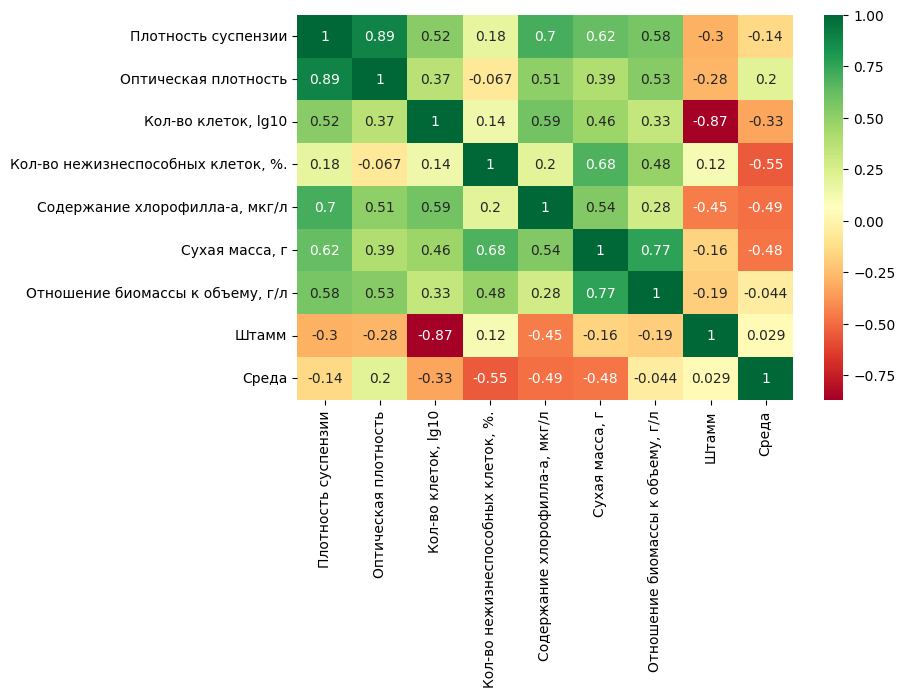

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

Optimal number of features: 3
Selected features: ['Плотность суспензии', 'Оптическая плотность', 'Отношение биомассы к объему, г/л']


AttributeError: 'RFECV' object has no attribute 'grid_scores_'

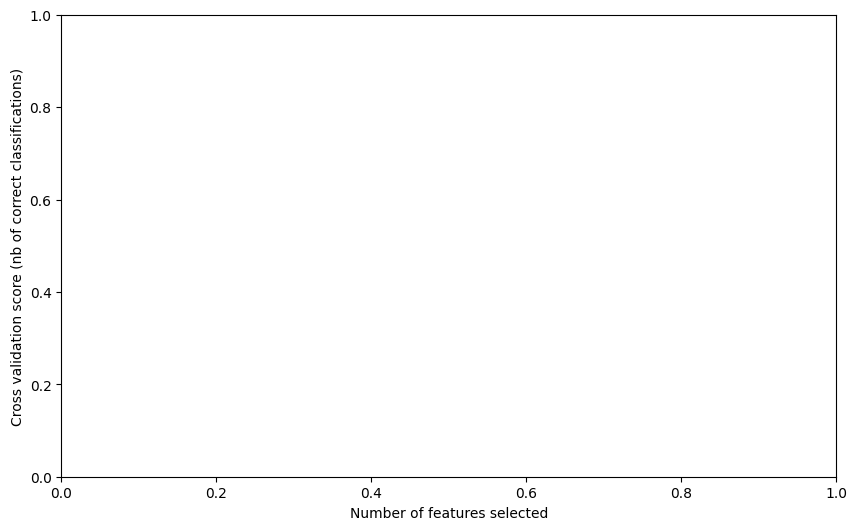

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

selected_features = list(X_train.columns[rfecv.support_])

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

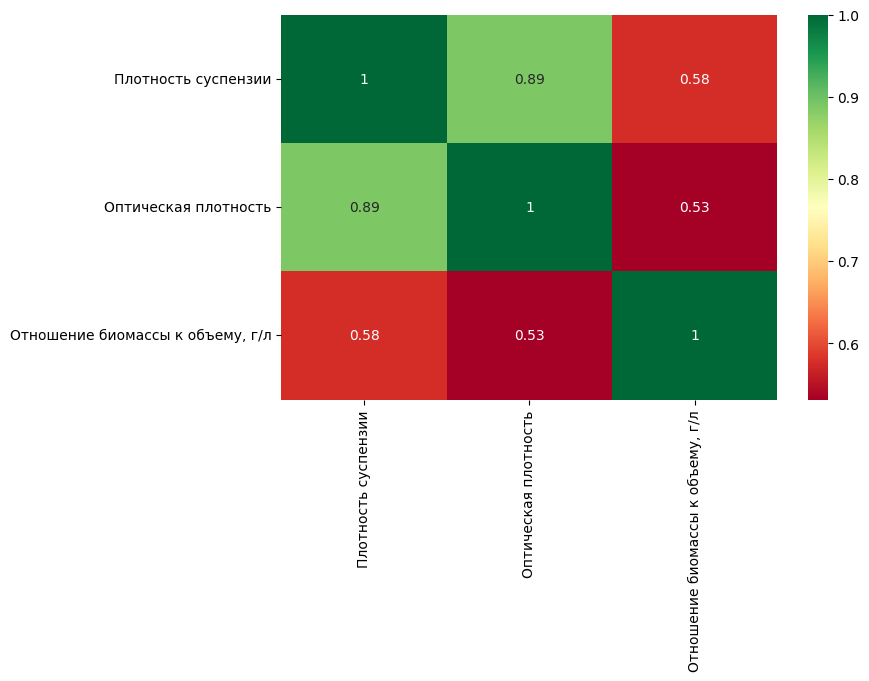

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
# Installation
#!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

ModuleNotFoundError: No module named 'lazypredict'

In [ ]:
predictions["RandomForestClassifier"]

NameError: name 'predictions' is not defined

In [ ]:
X_test

,Плотность суспензии,Оптическая плотность,"Отношение биомассы к объему, г/л"
66,0.115,0.135,0.046200
187,1.086,1.182,0.776900
147,0.618,0.425,0.184600
159,0.523,0.365,0.342900
72,0.615,0.747,0.575000
164,0.316,0.211,0.207407
2,0.193,0.227,0.050000
24,1.915,1.491,1.070000
156,0.566,0.336,0.369200
60,0.787,0.614,1.110000


In [ ]:
y_test

66     0
187    3
147    3
159    3
72     2
164    4
2      1
24     3
156    3
60     4
55     3
83     3
101    1
20     3
136    2
154    3
58     4
105    2
73     2
149    3
199    4
27     4
33     0
92     3
126    3
79     3
135    2
143    3
151    3
45     3
6      2
132    0
189    3
37     2
133    2
21     3
87     3
117    3
182    3
116    3
94     4
Name: Фаза, dtype: int64